## Učitavanje i sređivanje podataka

In [0]:
from datetime import datetime, date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pyspark.sql import SparkSession
from pyspark.sql import Row, Column, functions as F
from pyspark.sql.functions import *
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.stat import Correlation
from scipy.stats import f_oneway


In [0]:

schema1 = StructType([
    StructField("ID", IntegerType(), True),
    StructField("Title", StringType(), True),
    StructField("URL", StringType(), True),
    StructField("Is Paid", StringType(), True),
    StructField("Instructor Names", StringType(), True),
    StructField("Category", StringType(), True),
    StructField("Headline", StringType(), True),
    StructField("Num Subscribers", IntegerType(), True),
    StructField("Rating", DoubleType(), True),
    StructField("Num Reviews", IntegerType(), True),
    StructField("Instructional Level", StringType(), True),
    StructField("Objectives", StringType(), True),
    StructField("Curriculum", StringType(), True)
])

file_path1 = 'dbfs:/FileStore/udemy_courses-1.csv'  
df1 = spark.read.csv(file_path1, schema=schema1, header=True, quote='"', escape='"', multiLine=True)

df1.printSchema()

df1.select("ID", "Instructor Names", "Category", "Headline", "Num Subscribers", "Rating", "Num Reviews", "Instructional Level").show()

root
 |-- ID: integer (nullable = true)
 |-- Title: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- Is Paid: string (nullable = true)
 |-- Instructor Names: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Headline: string (nullable = true)
 |-- Num Subscribers: integer (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Num Reviews: integer (nullable = true)
 |-- Instructional Level: string (nullable = true)
 |-- Objectives: string (nullable = true)
 |-- Curriculum: string (nullable = true)

+-------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------------+
|     ID|    Instructor Names|   Category|            Headline|Num Subscribers|     Rating|Num Reviews|Instructional Level|
+-------+--------------------+-----------+--------------------+---------------+-----------+-----------+-------------------+
| 903744|Jose Portilla, Pi...|Development|Learn how to use ...|         838868|    

In [0]:
df1.select("ID", "Objectives" , "Curriculum").show()

+-------+--------------------+--------------------+
|     ID|          Objectives|          Curriculum|
+-------+--------------------+--------------------+
| 903744|Use Python for Da...|Course Introducti...|
| 995016|Build amazing Vue...|Getting Started, ...|
|1778502|You will create a...|Getting Started w...|
|1035000|How to use Docker...|Quick Start!, Wha...|
|1708340|Learn Flutter and...|Introduction, Wel...|
| 764164|Build websites an...|Getting Started, ...|
|1419182|Have a detailed k...|Course Introducti...|
| 950390|Master Machine Le...|Welcome to the co...|
| 903378|Gain a Solid & Un...|Course Introducti...|
| 756150|Learn modern Angu...|Getting Started, ...|
| 705264|Create dynamic we...|Let's Dive In!, H...|
|2473048|Become a professi...|Introduction, Cou...|
| 692188|Learn Python from...|MODULE 1??: PYTHO...|
| 822444|Create a fully fu...|Course Introducti...|
| 543600|Automate tasks on...|Python Basics, Ge...|
| 851712|Become an advance...|Welcome, Welcome,...|
| 959700|Cre

In [0]:
display(df1)

ID Title URL Is Paid Instructor Names Category Headline Num Subscribers Rating Num Reviews Instructional Level Objectives Curriculum 903744 Python for Data Science and Machine Learning Bootcamp https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/ TRUE Jose Portilla, Pierian Training Development Learn how to use NumPy, Pandas, Seaborn , Matplotlib , Plotly , Scikit-Learn , Machine Learning, Tensorflow , and more! 838868 5.0 166972 All Levels Use Python for Data Science and Machine Learning Use Spark for Big Data Analysis Implement Machine Learning Algorithms Course Introduction, Introduction to the Course, Course Help and Welcome, Course FAQs, Environment Set-Up, Python Environment Setup, Jupyter Overview, Updates to Notebook Zip, Jupyter Notebooks, Optional: Virtual Environments, Python Crash Course, Welcome to the Python Crash Course Section!, Introduction to Python Crash Course, Python Crash Course - Part 1, Python Crash Course - Part 2, Python Crash Course - Part 3, Python Crash Course - Part 4, Python Crash Course Exercises - Overview, Python Crash Course Exercises - Solutions, Python for Data Analysis - NumPy, Welcome to the NumPy Section!, Introduction to Numpy, Numpy Arrays, Quick Note on Array Indexing, Numpy Array Indexing, Numpy Operations, Numpy Exercises Overview, Numpy Exercises Solutions, Python for Data Analysis - Pandas, Welcome to the Pandas Section!, Introduction to Pandas, Series, DataFrames - Part 1, DataFrames - Part 2, DataFrames - Part 3, Missing Data, Groupby, Merging Joining and Concatenating, Operations, Data Input and Output, Python for Data Analysis - Pandas Exercises, Note on SF Salary Exercise, SF Salaries Exercise Overview, SF Salaries Solutions, Ecommerce Purchases Exercise Overview, Ecommerce Purchases Exercise Solutions, Python for Data Visualization - Matplotlib, Welcome to the Data Visualization Section!, Introduction to Matplotlib, Matplotlib Part 1, Matplotlib Part 2, Matplotlib Part 3, Matplotlib Exercises Overview, Matplotlib Exercises - Solutions, Python for Data Visualization - Seaborn, Introduction to Seaborn, Distribution Plots, Categorical Plots, Matrix Plots, Grids, Regression Plots, Style and Color, Seaborn Exercise Overview, Seaborn Exercise Solutions, Python for Data Visualization - Pandas Built-in Data Visualization, Pandas Built-in Data Visualization, Pandas Data Visualization Exercise, Pandas Data Visualization Exercise- Solutions, Python for Data Visualization - Plotly and Cufflinks, Introduction to Plotly and Cufflinks, READ ME FIRST BEFORE PLOTLY PLEASE!, Plotly and Cufflinks, Python for Data Visualization - Geographical Plotting, Introduction to Geographical Plotting, Choropleth Maps - Part 1 - USA, Choropleth Maps - Part 2 - World, Choropleth Exercises, Choropleth Exercises - Solutions, Data Capstone Project, Welcome to the Data Capstone Projects!, 911 Calls Project Overview, 911 Calls Solutions - Part 1, 911 Calls Solutions - Part 2, Bank Data, Finance Data Project Overview, Finance Project - Solutions Part 1, Finance Project - Solutions Part 2, Finance Project - Solutions Part 3, Introduction to Machine Learning, Welcome to Machine Learning. Here are a few resources to get you started!, Welcome to the Machine Learning Section!, Supervised Learning Overview, Evaluating Performance - Classification Error Metrics, Evaluating Performance - Regression Error Metrics, Machine Learning with Python, Linear Regression, Linear Regression Theory, model_selection Updates for SciKit Learn 0.18, Linear Regression with Python - Part 1, Linear Regression with Python - Part 2, Linear Regression Project Overview, Linear Regression Project Solution, Cross Validation and Bias-Variance Trade-Off, Bias Variance Trade-Off, Logistic Regression, Logistic Regression Theory, Logistic Regression with Python - Part 1, Logistic Regression with Python - Part 2, Logistic Regression with Python - Part 3, Logistic Regression Project Overview, Logistic Regression Project So

In [0]:
df_cleaned = df1.dropDuplicates(["ID"])

In [0]:
df_no_nulls = df_cleaned.dropna()


In [0]:
df_no_nulls.groupBy("Category").count().show()

df_no_nulls.groupBy("Instructional Level").count().show()

df_no_nulls.groupBy("Is Paid").count().show()

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|       IT & Software| 9888|
| Office Productivity| 3955|
|Personal Development|  686|
|Finance & Accounting| 7324|
|         Development| 9945|
|            Business| 9912|
+--------------------+-----+

+-------------------+-----+
|Instructional Level|count|
+-------------------+-----+
|       Expert Level|  863|
| Intermediate Level| 5368|
|         All Levels|23456|
|     Beginner Level|12023|
+-------------------+-----+

+-------+-----+
|Is Paid|count|
+-------+-----+
|  FALSE| 1052|
|   TRUE|40658|
+-------+-----+



In [0]:
df_with_numeric = df_no_nulls.withColumn(
    'Category_Numeric',
    when(df_no_nulls['Category'] == 'IT & Software', 0)
    .when(df_no_nulls['Category'] == 'Office Productivity', 1)
    .when(df_no_nulls['Category'] == 'Personal Development', 2)
    .when(df_no_nulls['Category'] == 'Finance & Accounting', 3)
    .when(df_no_nulls['Category'] == 'Development', 4)
    .when(df_no_nulls['Category'] == 'Business', 5)
    .otherwise(-1)  
)

df_with_numeric = df_with_numeric.withColumn(
    'Instructional_Level_Numeric',
    when(df_no_nulls['Instructional Level'] == 'Expert Level', 0)
    .when(df_no_nulls['Instructional Level'] == 'Intermediate Level', 1)
    .when(df_no_nulls['Instructional Level'] == 'All Levels', 2)
    .when(df_no_nulls['Instructional Level'] == 'Beginner Level', 3)
    .otherwise(-1)
)

df_with_numeric = df_with_numeric.withColumn(
    'Is_Paid_Numeric',
    when(df_no_nulls['Is Paid'] == 'TRUE', 1).otherwise(0)
)

df_with_numeric.select(
    "ID","Category", "Category_Numeric", 
    "Instructional Level", "Instructional_Level_Numeric", 
    "Is Paid", "Is_Paid_Numeric", "Rating"
).show()


+-----+--------------------+----------------+-------------------+---------------------------+-------+---------------+-----------+
|   ID|            Category|Category_Numeric|Instructional Level|Instructional_Level_Numeric|Is Paid|Is_Paid_Numeric|     Rating|
+-----+--------------------+----------------+-------------------+---------------------------+-------+---------------+-----------+
|11475|         Development|               4|         All Levels|                          2|   TRUE|              1|4.619334072|
|14284|            Business|               5|         All Levels|                          2|   TRUE|              1|4.475015524|
|17029|            Business|               5|         All Levels|                          2|   TRUE|              1|4.402846451|
|17708|Personal Development|               2|         All Levels|                          2|   TRUE|              1| 4.46472511|
|17782|            Business|               5|         All Levels|                         

In [0]:
df_with_numeric.filter(col("Rating") > 5.0).count()


Out[8]: 0

In [0]:

category_indexer = StringIndexer(inputCol="Category", outputCol="Category_Index", handleInvalid="skip")
instructional_level_indexer = StringIndexer(inputCol="Instructional Level", outputCol="Instructional_Level_Index", handleInvalid="skip")
is_paid_indexer = StringIndexer(inputCol="Is Paid", outputCol="Is_Paid_Index", handleInvalid="skip")

df_indexed = category_indexer.fit(df_no_nulls).transform(df_no_nulls)
df_indexed = instructional_level_indexer.fit(df_indexed).transform(df_indexed)
df_indexed = is_paid_indexer.fit(df_indexed).transform(df_indexed)

df_indexed.select("Category", "Category_Index", 
                  "Instructional Level", "Instructional_Level_Index", 
                  "Is Paid", "Is_Paid_Index").show()

+--------------------+--------------+-------------------+-------------------------+-------+-------------+
|            Category|Category_Index|Instructional Level|Instructional_Level_Index|Is Paid|Is_Paid_Index|
+--------------------+--------------+-------------------+-------------------------+-------+-------------+
|         Development|           0.0|         All Levels|                      0.0|   TRUE|          0.0|
|            Business|           1.0|         All Levels|                      0.0|   TRUE|          0.0|
|            Business|           1.0|         All Levels|                      0.0|   TRUE|          0.0|
|Personal Development|           5.0|         All Levels|                      0.0|   TRUE|          0.0|
|            Business|           1.0|         All Levels|                      0.0|   TRUE|          0.0|
| Office Productivity|           4.0|       Expert Level|                      3.0|   TRUE|          0.0|
|Finance & Accounting|           3.0|         

## Testovi

### Korelaciona matrica

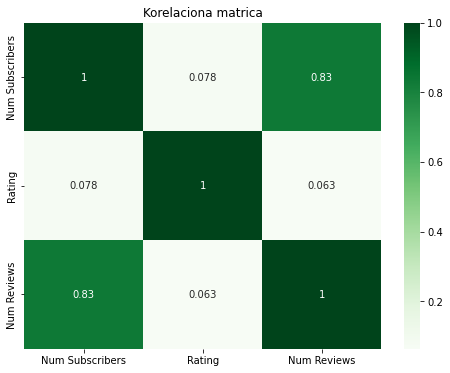

In [0]:

vector_col = "features"
assembler = VectorAssembler(
    inputCols=["Num Subscribers", "Rating", "Num Reviews"],  
    outputCol="features"
)
df_vector = assembler.transform(df_with_numeric).select(vector_col)

matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corr_matrix = matrix.toArray()

columns = ["Num Subscribers", "Rating", "Num Reviews"]

corr_df = pd.DataFrame(data=corr_matrix, columns=columns, index=columns)

plt.figure(figsize=(8, 6))
sb.heatmap(corr_df, annot=True, cmap="Greens")
plt.title("Korelaciona matrica")
plt.show()



**Nulta hipoteza**: Ne postoji statistički značajna korelacija između broja pretplatnika, ocene kursa i broja recenzija (tj. Spearmanov koeficijent korelacije je 0).

**Alternativna hipoteza**: Postoji statistički značajna korelacija između broja pretplatnika, ocene kursa i broja recenzija (tj. Spearmanov koeficijent korelacije nije 0).

**Rezultat**:
Spearmanova korelaciona matrica prikazuje povezanost između sledećih varijabli:

Broj pretplatnika i broj recenzija imaju visoku pozitivnu korelaciju (0.83), što ukazuje na to da kursevi sa više pretplatnika obično imaju i veći broj recenzija.

Broj pretplatnika i ocena kursa (rating) pokazuju vrlo slabu korelaciju (0.078), što znači da popularnost kursa ne utiče značajno na njegovu ocenu.

Broj recenzija i ocena kursa takođe imaju vrlo slabu korelaciju (0.063), što sugeriše da veći broj recenzija ne znači nužno i bolju ocenu kursa.

P-vrednost za ove testove je veoma mala (ispod 0.05), što nam omogućava da odbacimo nultu hipotezu i zaključimo da postoji statistički značajna korelacija između broja pretplatnika i broja recenzija, dok je veza sa ocenom kursa zanemarljiva.

**Zaključak**:
Ova analiza može biti korisna platformi, jer ukazuje na to da veći broj pretplatnika dovodi do većeg broja recenzija, ali ne nužno i do viših ocena kurseva. Ovo može pomoći kreatorima kurseva da razumeju kako se njihovi kursevi ocenjuju i kako marketing strategije mogu uticati na popularnost, ali ne i na kvalitet kursa prema ocenama korisnika.

### Spearmanov test

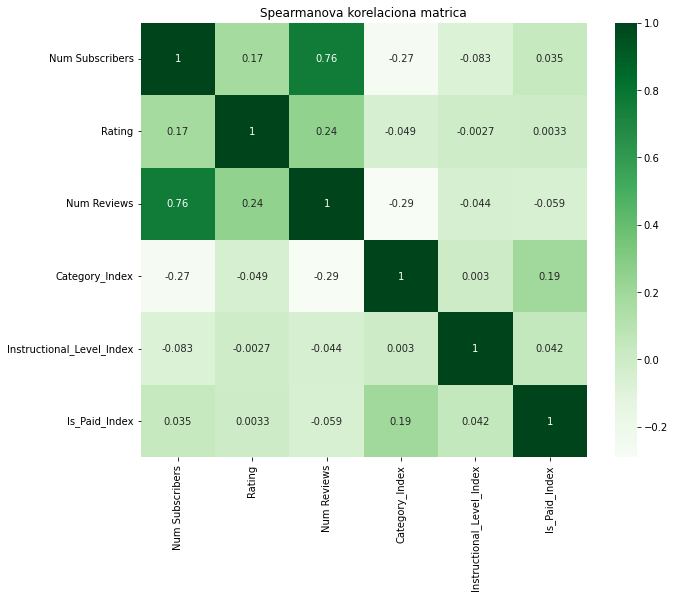

In [0]:


columns_for_spearman = ["Num Subscribers", "Rating", "Num Reviews", "Category_Index", "Instructional_Level_Index", "Is_Paid_Index"]

spearman_analysis_df = df_indexed.select(columns_for_spearman)

vector_col = "features"
assembler = VectorAssembler(inputCols=columns_for_spearman, outputCol=vector_col)
df_vector = assembler.transform(spearman_analysis_df).select(vector_col)

matrix = Correlation.corr(df_vector, vector_col, method="spearman").head()[0]
corr_matrix = matrix.toArray()

corr_df = pd.DataFrame(data=corr_matrix, columns=columns_for_spearman, index=columns_for_spearman)

plt.figure(figsize=(10, 8))
sb.heatmap(corr_df, annot=True, cmap="Greens")
plt.title("Spearmanova korelaciona matrica")
plt.show()


In [0]:

num_subscribers = df_indexed.select("Num Subscribers").toPandas().values.flatten()
num_reviews = df_indexed.select("Num Reviews").toPandas().values.flatten()

corr, p_value = spearmanr(num_subscribers, num_reviews)

print(f"Spearmanov koeficijent korelacije (r): {corr}")
print(f"P-vrednost: {p_value}")


Spearmanov koeficijent korelacije (r): 0.7595154408230788
P-vrednost: 0.0



**Nulta hipoteza**: Ne postoji statistički značajna monotona korelacija između broja pretplatnika, ocene kursa, broja recenzija, kategorije kursa, nivoa težine kursa i toga da li je kurs besplatan ili plaćen.

**Alternativna hipoteza**: Postoji statistički značajna monotona korelacija između nekih od navedenih varijabli.
Rezultat:
Spearmanova korelaciona matrica meri monotone odnose između promenljivih:

**Rezultat**:

Broj pretplatnika i broj recenzija pokazuju visoku pozitivnu korelaciju (0.76), što potvrđuje prethodne nalaze – popularniji kursevi imaju više recenzija.

Ocena kursa i broj pretplatnika pokazuju slabu pozitivnu korelaciju (0.17), što sugeriše da popularnost kursa blago utiče na njegovu ocenu, ali ne značajno.

Ocena kursa i broj recenzija takođe imaju slabu pozitivnu korelaciju (0.24), što znači da kursi sa više recenzija imaju tendenciju da imaju blago bolje ocene, ali ta veza nije jaka.

Kategorija kursa negativno korelira sa brojem pretplatnika (-0.27) i brojem recenzija (-0.29), što ukazuje na to da određene kategorije kurseva imaju manji broj pretplatnika i recenzija u proseku.

Nivo težine kursa i sve druge varijable nemaju značajne korelacije, što znači da težina kursa ne utiče značajno na broj pretplatnika, ocenu ili broj recenzija.

Plaćeni kursevi blago pozitivno koreliraju sa kategorijom kursa (0.19), što može značiti da su određene kategorije kurseva češće plaćene.

P-vrednosti za ove testove su veoma niske (ispod 0.05), što nam omogućava da odbacimo nultu hipotezu i zaključimo da postoji statistički značajna korelacija između broja pretplatnika i broja recenzija, kao i blage korelacije između ocene i broja recenzija.

**Zaključak**:
Ova analiza može pomoći kreatorima kurseva i platformami kako različiti faktori, poput kategorije kursa i njegove popularnosti, utiču na interakcije korisnika. Na primer, kursevi sa više pretplatnika imaju više recenzija, ali ne nužno i bolje ocene. Takođe, određene kategorije kurseva su popularnije i češće se plaćaju. Ove informacije mogu biti korisne pri kreiranju novih kurseva ili određivanju cena i promocija.

### ANOVA test

In [0]:

categories_rating = df_with_numeric.select("Category_Numeric", "Rating").groupBy("Category_Numeric").agg(
    F.collect_list("Rating").alias("Rating_List")
)

categories_data = categories_rating.collect()
anova_groups = [row["Rating_List"] for row in categories_data]

f_stat, p_value = f_oneway(*anova_groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


F-statistic: 510.71644878246076
P-value: 0.0


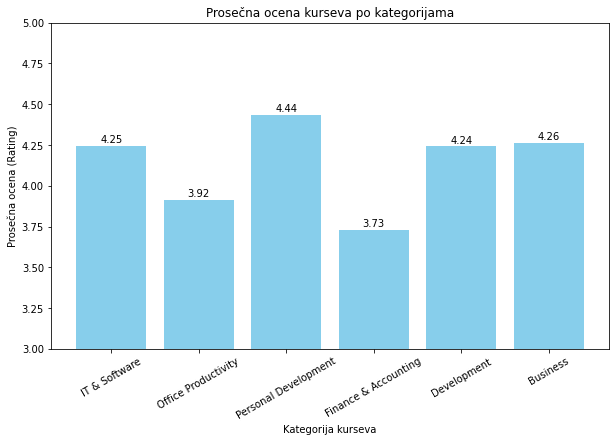

In [0]:


category_mapping = {
    0: "IT & Software",
    1: "Office Productivity",
    2: "Personal Development",
    3: "Finance & Accounting",
    4: "Development",
    5: "Business"
}

category_avg_rating = df_with_numeric.groupBy("Category_Numeric").agg(F.avg("Rating").alias("Avg_Rating"))

category_avg_rating_df = category_avg_rating.toPandas()

category_avg_rating_df["Category"] = category_avg_rating_df["Category_Numeric"].map(category_mapping)

category_avg_rating_df = category_avg_rating_df.sort_values("Category_Numeric")

plt.figure(figsize=(10, 6))
plt.bar(category_avg_rating_df["Category"], category_avg_rating_df["Avg_Rating"], color="skyblue")
plt.xlabel("Kategorija kurseva")
plt.ylabel("Prosečna ocena (Rating)")
plt.title("Prosečna ocena kurseva po kategorijama")

plt.ylim(3, 5)

for index, row in category_avg_rating_df.iterrows():
    plt.text(row["Category"], row["Avg_Rating"] + 0.02, f"{row['Avg_Rating']:.2f}", ha='center')

plt.xticks(rotation=30) 
plt.show()




**Hipoteza ANOVA testa**:

**Nulta hipoteza**: Nema značajne razlike u prosečnim ocenama kurseva između različitih kategorija.

**Alternativna hipoteza**: Postoji značajna razlika u prosečnim ocenama kurseva između barem dve kategorije.

**Rezultati**:

F-statistika: 510.72 (veoma visoka vrednost, što ukazuje na značajne razlike između grupa).

P-vrednost: 0.0 (manja od 0.05), što znači da postoji statistički značajna razlika između prosečnih ocena kurseva u različitim kategorijama.

Na osnovu ovih rezultata, možemo odbaciti nultu hipotezu i zaključiti da se ocene kurseva značajno razlikuju u zavisnosti od kategorije.

**Analiza grafikona**:

Najbolje ocenjena kategorija: Personal Development (4.44), što može značiti da su kursevi iz ove kategorije generalno kvalitetniji ili da korisnici imaju veću tendenciju da daju više ocene.

Najlošije ocenjena kategorija: Finance & Accounting (3.73), što može ukazivati na to da su ovi kursevi možda manje kvalitetni, složeniji ili ne ispunjavaju očekivanja korisnika.

Druge kategorije imaju prosečne ocene između 3.9 i 4.3, pri čemu Business (4.26), Development (4.24) i IT & Software (4.25) imaju relativno slične ocene.

**Kome može biti korisno?**

1)Kreatorima kurseva: Ova analiza im može pomoći da shvate koje kategorije su visoko ocenjene i gde postoji prostor za poboljšanje.

2)Platformi: Moze koristiti ove informacije za optimizaciju preporuka korisnicima, poboljšanje kvaliteta sadržaja u slabije ocenjenim kategorijama i strategije cena.

3)Korisnicima: Mogu doneti informisanije odluke prilikom izbora kurseva, jer znaju koje kategorije su generalno bolje ocenjene.


In [0]:
kafka_courses = df_with_numeric.filter(col("Headline").contains("Kafka"))

average_rating_kafka = kafka_courses.agg({"Rating": "avg"}).collect()[0][0]

average_rating_kafka

Out[30]: 4.177774846088235

In [0]:


categories = df_with_numeric.select("Category_Numeric", "Num Subscribers").groupBy("Category_Numeric").agg(
    F.collect_list("Num Subscribers").alias("Subscribers_List")
)

categories_data = categories.collect()
anova_groups = [row["Subscribers_List"] for row in categories_data]

f_stat, p_value = f_oneway(*anova_groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 154.66812037312965
P-value: 2.271770487604881e-163


In [0]:


subscribers_by_category = df_with_numeric.groupBy("Category_Numeric").agg(
    F.sum("Num Subscribers").alias("Total_Subscribers")
)

subscribers_by_category.orderBy(F.desc("Total_Subscribers")).show()


+----------------+-----------------+
|Category_Numeric|Total_Subscribers|
+----------------+-----------------+
|               4|        164145401|
|               0|         93178295|
|               5|         71578390|
|               3|         27638814|
|               1|         25992424|
|               2|         14294034|
+----------------+-----------------+



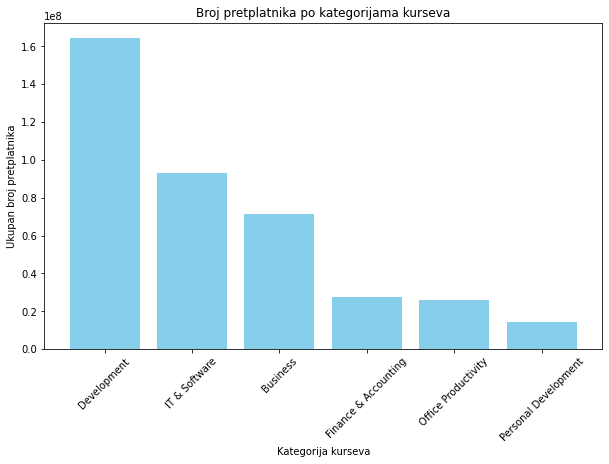

In [0]:


category_mapping = {
    0: "IT & Software",
    1: "Office Productivity",
    2: "Personal Development",
    3: "Finance & Accounting",
    4: "Development",
    5: "Business"
}

subscribers_by_category_pd = subscribers_by_category.toPandas().sort_values("Total_Subscribers", ascending=False)

subscribers_by_category_pd["Category_Name"] = subscribers_by_category_pd["Category_Numeric"].map(category_mapping)

plt.figure(figsize=(10, 6))
plt.bar(subscribers_by_category_pd["Category_Name"], subscribers_by_category_pd["Total_Subscribers"], color="skyblue")
plt.xlabel("Kategorija kurseva")
plt.ylabel("Ukupan broj pretplatnika")
plt.title("Broj pretplatnika po kategorijama kurseva")
plt.xticks(rotation=45)
plt.show()



**Hipoteza ANOVA testa**:

**Nulta hipoteza**: Nema značajne razlike u broju pretplatnika između različitih kategorija kurseva.

**Alternativna hipoteza**: Postoji značajna razlika u broju pretplatnika između barem dve kategorije kurseva.

**Rezultati**:

F-statistika: 154.67 (veoma visoka vrednost, što ukazuje na značajne razlike između grupa).

P-vrednost: 2.27e-163 (što je daleko ispod praga značajnosti od 0.05), što znači da postoji statistički značajna razlika u broju pretplatnika među različitim kategorijama kurseva.

Na osnovu ovih rezultata, možemo odbaciti nultu hipotezu i zaključiti da se broj pretplatnika značajno razlikuje u zavisnosti od kategorije kurseva.

**Analiza grafikona**:

Najpopularnija kategorija po broju pretplatnika je Development, što ukazuje na veliki interes za kurseve vezane za razvoj softvera, programiranje i tehnologiju.

Druga najpopularnija kategorija je IT & Software, što pokazuje da kursevi koji se bave IT sektorom i tehnologijama takođe imaju veliki broj polaznika.

Kategorije sa najmanjim brojem pretplatnika su Personal Development i Office Productivity, što može značiti da su ove teme manje tražene na platformi ili da imaju manju privlačnost za korisnike.

Business i Finance & Accounting se nalaze na sredini, pokazujući umeren interes korisnika.

**Kome može biti korisno?**

1)Platformi: Ovi rezultati mogu pomoći platformami za online kurseve da shvati u koje oblasti vredi dodatno ulagati i razvijati nove kurseve koji će privući više korisnika.

2)Kreatorima kurseva: Nastavnici i predavači mogu koristiti ove podatke kako bi odlučili koje kurseve da kreiraju i plasiraju na tržištu kako bi postigli veću vidljivost i angažovanost korisnika.

3)Korisnicima: Ova analiza može pomoći potencijalnim polaznicima kurseva da vide koje oblasti su najpopularnije i gde se najviše polaznika upisuje, što može uticati na njihov izbor kursa.



**Analiza IT tehnologija**

In [0]:
num1 = df_with_numeric.filter(col("Headline").rlike("(?i)Python")).agg(avg("Rating").alias("Average_Rating"))
num2 = df_with_numeric.filter(col("Headline").rlike("(?i)Java")).agg(avg("Rating").alias("Average_Rating"))
num3 = df_with_numeric.filter(col("Headline").rlike("(?i)C#")).agg(avg("Rating").alias("Average_Rating"))
num4 = df_with_numeric.filter(col("Headline").rlike("(?i)JavaScript")).agg(avg("Rating").alias("Average_Rating"))
num5 = df_with_numeric.filter(col("Headline").rlike("(?i)Docker")).agg(avg("Rating").alias("Average_Rating"))
num6 = df_with_numeric.filter(col("Headline").rlike("(?i)HTML")).agg(avg("Rating").alias("Average_Rating"))



In [0]:
cat6 = df_with_numeric.filter(col("Headline").rlike("(?i)HTML")).count()
cat1 = df_with_numeric.filter(col("Headline").rlike("(?i)Python")).count()
cat2 = df_with_numeric.filter(col("Headline").rlike("(?i)Java")).count()
cat3 = df_with_numeric.filter(col("Headline").rlike("(?i)C#")).count()
cat4 = df_with_numeric.filter(col("Headline").rlike("(?i)JavaScript")).count()
cat5 = df_with_numeric.filter(col("Headline").rlike("(?i)Docker")).count()


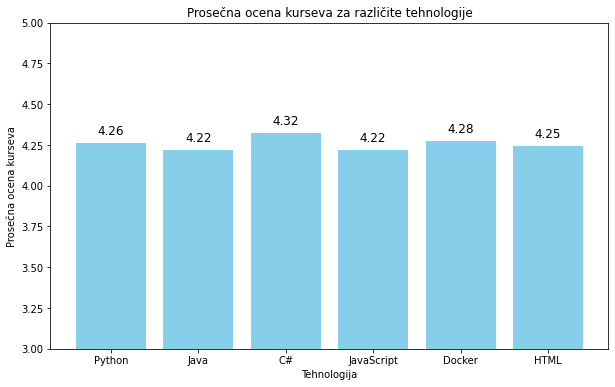

In [0]:

num1_value = num1.collect()[0]["Average_Rating"]
num2_value = num2.collect()[0]["Average_Rating"]
num3_value = num3.collect()[0]["Average_Rating"]
num4_value = num4.collect()[0]["Average_Rating"]
num5_value = num5.collect()[0]["Average_Rating"]
num6_value = num6.collect()[0]["Average_Rating"]


categories = ["Python", "Java", "C#", "JavaScript", "Docker" , "HTML"]
average_ratings = [num1_value, num2_value, num3_value, num4_value, num5_value , num6_value]

plt.figure(figsize=(10, 6))
plt.bar(categories, average_ratings, color="skyblue")

plt.xlabel("Tehnologija")
plt.ylabel("Prosečna ocena kurseva")
plt.title("Prosečna ocena kurseva za različite tehnologije")

for i, v in enumerate(average_ratings):
    plt.text(i, v + 0.05, f"{v:.2f}", ha="center", fontsize=12)

plt.ylim(3, 5)  

plt.show()


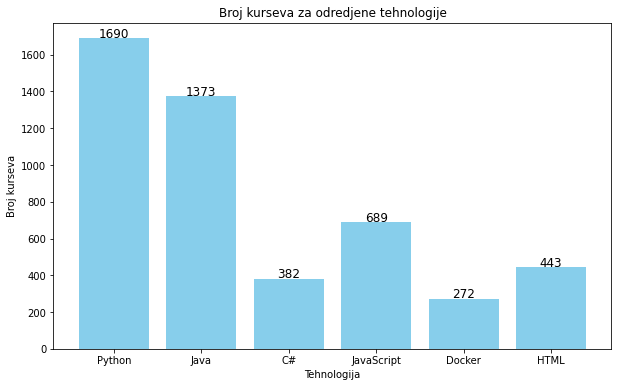

In [0]:

categories = ["Python", "Java", "C#", "JavaScript", "Docker", "HTML"]
course_counts = [cat1, cat2, cat3, cat4, cat5, cat6]

plt.figure(figsize=(10, 6))
plt.bar(categories, course_counts, color="skyblue")

plt.xlabel("Tehnologija")
plt.ylabel("Broj kurseva")
plt.title("Broj kurseva za odredjene tehnologije")

for i, v in enumerate(course_counts):
    plt.text(i, v + 5, str(v), ha="center", fontsize=12)

plt.show()


**Analiza kurseva po tehnologijama – broj i prosečna ocena kurseva**

**Cilj analize**:
Ova analiza ispituje popularnost kurseva na osnovu dve ključne metrike:

Broj dostupnih kurseva po tehnologiji – Koliko kurseva postoji za određene programerske jezike i tehnologije?

Prosečna ocena kurseva – Kako korisnici ocenjuju kurseve iz različitih tehnologija?

**Rezultati analize**:

1. Broj dostupnih kurseva po tehnologijama

Python je najdominantnija tehnologija sa 1690 kurseva, dok Java prati sa 1373 kurseva.
JavaScript ima značajan broj kurseva (689), dok su tehnologije poput C# (382), Docker (272) i HTML (443) manje zastupljene.Ovaj rezultat ukazuje na to da su kursevi o Pythonu i Javi najpopularniji među predavačima, što može biti posledica velike potražnje za ovim tehnologijama u industriji.

2. Prosečna ocena kurseva po tehnologijama

Sve analizirane tehnologije imaju prosečne ocene kurseva između 4.22 i 4.32, što ukazuje na relativno visok kvalitet kurseva u svim kategorijama.Najbolje ocenjeni kursevi su iz oblasti C# (4.32), što može značiti da su kursevi ove kategorije detaljniji i bolje strukturirani.Python (4.26) i Docker (4.28) imaju vrlo slične prosečne ocene, dok su Java i JavaScript ocenjeni sa 4.22, što su i dalje relativno visoke ocene.

**Zaključak**:

Iako Python i Java dominiraju u broju dostupnih kurseva, to ne znači nužno da su i najbolje ocenjeni – kursevi iz oblasti C# i Docker-a imaju nešto više prosečne ocene.Možda postoji problem sa kvalitetom nekih Python i Java kurseva, budući da ih ima mnogo, ali ne postižu najbolje prosečne ocene.

**Kome može biti korisno?**

1)Budućim korisnicima online kurseva – Ova analiza može im pomoći da prepoznaju oblasti gde postoji najveći izbor kurseva, kao i da donesu odluku na osnovu prosečne ocene.

2)Predavačima i kreatorima kurseva – Mogu koristiti podatke kako bi identifikovali gde postoji najveća konkurencija i gde postoji prostor za poboljšanje.

3)Platformi – Može im pomoći u boljoj kategorizaciji kurseva, optimizaciji preporuka i razvoju strategija za poboljšanje kvaliteta nastave.

**Odnos besplatnih i plaćenih kurseva po kategorijama**

In [0]:

df_category_payment = df_with_numeric.groupBy("Category_Numeric").agg(
    (count(when(col("Is_Paid_Numeric") == 1, 1)) / count("*") * 100).alias("Paid_Percentage"),
    (count(when(col("Is_Paid_Numeric") == 0, 1)) / count("*") * 100).alias("Free_Percentage")
)

df_category_payment.show(truncate=False)




+----------------+-----------------+------------------+
|Category_Numeric|Paid_Percentage  |Free_Percentage   |
+----------------+-----------------+------------------+
|1               |92.21238938053096|7.787610619469026 |
|3               |89.8416166029492 |10.158383397050793|
|5               |100.0            |0.0               |
|4               |100.0            |0.0               |
|2               |100.0            |0.0               |
|0               |100.0            |0.0               |
+----------------+-----------------+------------------+



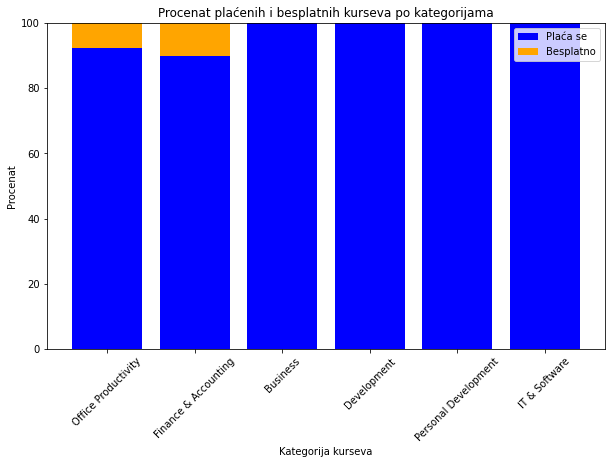

In [0]:

df_category_payment_pd = df_category_payment.toPandas()

category_mapping = {
    0: "IT & Software",
    1: "Office Productivity",
    2: "Personal Development",
    3: "Finance & Accounting",
    4: "Development",
    5: "Business"
}
df_category_payment_pd["Category"] = df_category_payment_pd["Category_Numeric"].map(category_mapping)

plt.figure(figsize=(10, 6))
plt.bar(df_category_payment_pd["Category"], df_category_payment_pd["Paid_Percentage"], color="blue", label="Plaća se")
plt.bar(df_category_payment_pd["Category"], df_category_payment_pd["Free_Percentage"], color="orange", bottom=df_category_payment_pd["Paid_Percentage"], label="Besplatno")

plt.xlabel("Kategorija kurseva")
plt.ylabel("Procenat")
plt.title("Procenat plaćenih i besplatnih kurseva po kategorijama")
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Analiza procenta plaćenih i besplatnih kurseva po kategorijama**

**Cilj analize**:

Ova analiza ima za cilj da prikaže odnos između plaćenih i besplatnih kurseva u različitim kategorijama kako bi se stekao uvid u pristupačnost obrazovnog sadržaja.

**Rezultati analize**:
Gotovo sve kategorije kurseva su dominantno plaćene, što ukazuje na to da većina instruktora ili obrazovnih platformi monetizuje svoj sadržaj.Kategorije "Finance & Accounting" i "Office Productivity" imaju određeni procenat besplatnih kurseva u poređenju sa ostalim kategorijama.Kategorije "Development", "IT & Software" i "Business" sadrže isključivo plaćene kurseve, što može biti rezultat visoke tržišne vrednosti znanja iz ovih oblasti.

**Zaključak**:

Obrazovni sadržaj u IT sektoru je uglavnom komercijalizovan, što znači da studenti i profesionalci moraju biti spremni na ulaganje u obrazovanje kako bi stekli relevantne veštine.
Finansijski i poslovni kursevi imaju nešto veću dostupnost besplatnog sadržaja, što može biti korisno za početnike koji žele da steknu osnovna znanja bez finansijskih troškova.
Besplatni kursevi su i dalje u manjini, što može predstavljati prepreku za ljude koji žele da se edukuju, ali nemaju mogućnost da plate kurseve.

**Kome može biti korisno?**

1)Budućim polaznicima kurseva – Ova analiza im može pomoći da razumeju u kojim oblastima mogu pronaći više besplatnog sadržaja, a za koje oblasti će verovatno morati da plate.

2)Platformi – Ova informacija može im pomoći u kreiranju boljih poslovnih modela i strategija za besplatne i premium kurseve.

3)Kreatorima kurseva – Instruktori mogu koristiti ove podatke kako bi razumeli tržišnu dinamiku i odlučili da li žele da ponude besplatne uvodne kurseve kako bi privukli više korisnika.

**Linearna regresija**

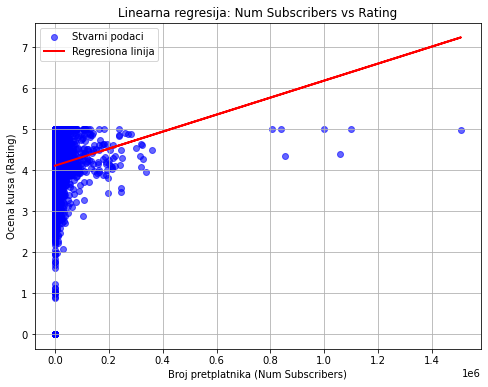

R-squared: 0.006254132035763638
RMSE: 0.8770326737571356


In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

assembler = VectorAssembler(inputCols=['Num Subscribers'], outputCol='features')
data = assembler.transform(df_with_numeric.select('Num Subscribers', 'Rating')).select('features', 'Rating')

train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

lr = LinearRegression(featuresCol='features', labelCol='Rating')
lr_model = lr.fit(train_data)

predictions = lr_model.transform(test_data)

get_first_value_udf = udf(lambda v: float(v[0]), DoubleType())
predictions = predictions.withColumn('Num_Subscribers_Extr', get_first_value_udf('features'))

predictions_pandas = predictions.select(
    'Num_Subscribers_Extr',
    'Rating',
    'prediction'
).toPandas()

x = predictions_pandas['Num_Subscribers_Extr'] 
y_actual = predictions_pandas['Rating']
y_pred = predictions_pandas['prediction']

plt.figure(figsize=(8, 6))
plt.scatter(x, y_actual, label='Stvarni podaci', color='blue', alpha=0.6)
plt.plot(x, y_pred, label='Regresiona linija', color='red', linewidth=2)
plt.xlabel('Broj pretplatnika (Num Subscribers)')
plt.ylabel('Ocena kursa (Rating)')
plt.title('Linearna regresija: Num Subscribers vs Rating')
plt.legend()
plt.grid()
plt.show()

r2 = lr_model.summary.r2
rmse = lr_model.summary.rootMeanSquaredError
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")



**Analiza linearne i polinomijalne regresije**

Rezultati linearne regresije:

R-squared (R²): 0.0062 → Ova vrednost je veoma niska, što znači da model ne uspeva da objasni varijabilnost ocena kurseva (Rating) na osnovu broja pretplatnika (Num Subscribers).

RMSE: 0.877 → Pokazuje značajnu grešku u predikcijama, što znači da model ne daje tačne prognoze.

Takođe, pokušana je i polinomijalna regresija, ali rezultati nisu bili značajno bolji, što ukazuje na to da ne postoji jasna funkcionalna zavisnost između broja pretplatnika i ocene kursa.

**Zaključak**
Linearni i polinomijalni modeli nisu odgovarajući za predviđanje ocene kursa na osnovu broja pretplatnika, što znači da ocene ne zavise direktno od popularnosti kursa, već na njih utiču drugi faktori poput kvaliteta predavača, sadržaja i recenzija korisnika.

**Jednostavne analize**

In [0]:
from pyspark.sql.functions import count

df_instructional_level = df_with_numeric.groupBy("Instructional_Level_Numeric").agg(
    count("*").alias("Number_of_Courses")
)
df_instructional_level.show()

+---------------------------+-----------------+
|Instructional_Level_Numeric|Number_of_Courses|
+---------------------------+-----------------+
|                          1|             5368|
|                          3|            12023|
|                          2|            23456|
|                          0|              863|
+---------------------------+-----------------+



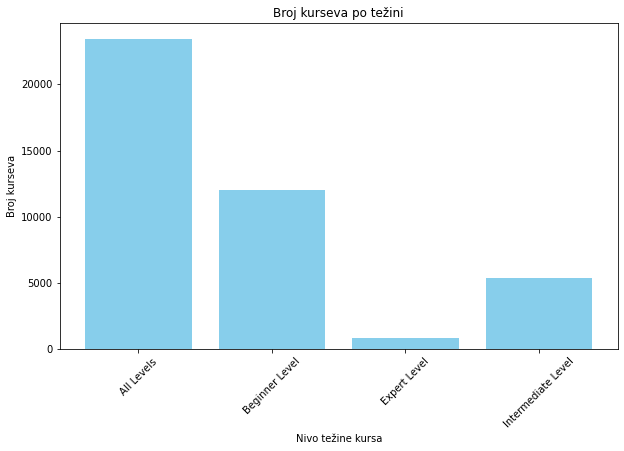

In [0]:

instructional_level_mapping = {
    0: "Expert Level",
    1: "Intermediate Level",
    2: "All Levels",
    3: "Beginner Level",
    -1: "Unknown"
}

df_instructional_level_pd = df_instructional_level.toPandas()

df_instructional_level_pd["Instructional_Level_Numeric"] = df_instructional_level_pd["Instructional_Level_Numeric"].map(instructional_level_mapping)

df_instructional_level_pd = df_instructional_level_pd.sort_values("Instructional_Level_Numeric")

plt.figure(figsize=(10, 6))
plt.bar(df_instructional_level_pd["Instructional_Level_Numeric"], df_instructional_level_pd["Number_of_Courses"], color="skyblue")

plt.xlabel("Nivo težine kursa")
plt.ylabel("Broj kurseva")
plt.title("Broj kurseva po težini")
plt.xticks(rotation=45)

plt.show()


**Analiza broja kurseva po težini**

**Ovaj grafikon prikazuje raspodelu kurseva prema nivou težine:**

Najviše kurseva pripada kategoriji "All Levels", što znači da su prilagođeni svim nivoima znanja. Ovo može ukazivati na to da su predavači skloni kreiranju univerzalnih kurseva kako bi obuhvatili širu publiku.
"Beginner Level" ima značajan broj kurseva, što ukazuje na veliku potražnju za osnovnim edukacijama.
"Intermediate Level" kurseva je manje u odnosu na početne, dok "Expert Level" ima najmanje kurseva, što može značiti da postoji manja ciljna grupa za napredne kurseve ili da su takvi kursevi zahtevniji za kreiranje.

**Zaključak**

Ova analiza može biti korisna platformi,predavačima i kako bi razumeli raspodelu kurseva i potencijalno povećali ponudu naprednih kurseva tamo gde postoji potražnja. Takođe, korisnicima može pomoći u odabiru kursa koji odgovara njihovom nivou znanja.

In [0]:
total_courses = df_with_numeric.count()

dr_courses = df_with_numeric.filter(F.col("Instructor Names").rlike(r"\bDr\.?\b")).count()

dr_courses_percentage = (dr_courses / total_courses) * 100
print(f"Broj kurseva sa instruktorima koji imaju titulu 'Dr.': {dr_courses}")

print(f"Procenat kurseva sa instruktorima koji imaju titulu 'Dr.': {dr_courses_percentage:.2f}%")


Broj kurseva sa instruktorima koji imaju titulu 'Dr.': 912
Procenat kurseva sa instruktorima koji imaju titulu 'Dr.': 2.19%


**Analiza prisustva instruktora sa titulom doktora u kursevima**

**Opis analize:**

Analizirali smo prisustvo instruktora sa titulom doktora u kursevima i ustanovili da ukupno 912 kurseva ima predavača sa ovom titulom. To čini samo 2.19% ukupnog broja kurseva, što znači da je velika većina kurseva kreirana od strane instruktora bez ove titule.
### 
Ovi podaci mogu biti korisni za korisnike i polaznike kurseva koji imaju predrasude ili veću sklonost da biraju kurseve koje predaju doktori nauka.
Instruktori sa titulom doktora mogu koristiti ove podatke kako bi sagledali svoju zastupljenost na platformi i eventualno radili na boljoj promociji svojih kurseva.
Iako broj kurseva sa doktorima nije dominantan, to ne znači nužno da su ovi kursevi kvalitetniji ili lošiji, ali može biti važan faktor za one koji veruju da akademska titula instruktora doprinosi kredibilitetu i stručnosti kursa.

In [0]:
reviews_percentage = df_with_numeric.groupBy("Category_Numeric").agg(
    F.sum("Num Reviews").alias("Total_Reviews"),
    F.sum("Num Subscribers").alias("Total_Subscribers"),
    (F.sum("Num Reviews") / F.sum("Num Subscribers") * 100).alias("Review_Percentage")
)

reviews_percentage.show()

+----------------+-------------+-----------------+------------------+
|Category_Numeric|Total_Reviews|Total_Subscribers| Review_Percentage|
+----------------+-------------+-----------------+------------------+
|               1|      2837859|         25992424|10.918023651814853|
|               3|      2093632|         27638814| 7.574970474492863|
|               5|      9215503|         71578390|12.874700031671571|
|               4|     15801610|        164145401| 9.626593193433425|
|               2|      2495695|         14294034|17.459696821764943|
|               0|      9594535|         93178295|10.296963472018886|
+----------------+-------------+-----------------+------------------+



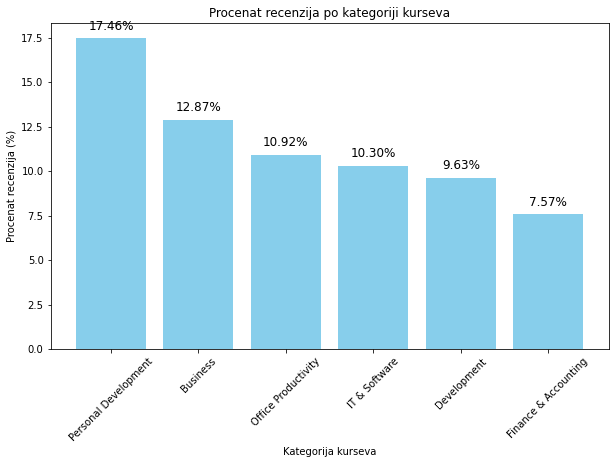

In [0]:
category_mapping = {
    0: "IT & Software",
    1: "Office Productivity",
    2: "Personal Development",
    3: "Finance & Accounting",
    4: "Development",
    5: "Business",
    -1: "Unknown"
}

reviews_percentage_pd = reviews_percentage.toPandas()

reviews_percentage_pd["Category_Numeric"] = reviews_percentage_pd["Category_Numeric"].map(category_mapping)

reviews_percentage_pd = reviews_percentage_pd.sort_values("Review_Percentage", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(reviews_percentage_pd["Category_Numeric"], reviews_percentage_pd["Review_Percentage"], color="skyblue")

plt.xlabel("Kategorija kurseva")
plt.ylabel("Procenat recenzija (%)")
plt.title("Procenat recenzija po kategoriji kurseva")
plt.xticks(rotation=45)

for i, v in enumerate(reviews_percentage_pd["Review_Percentage"]):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha="center", fontsize=12)

plt.show()


**Analiza procenta recenzija po kategorijama kurseva**

**Opis analize:**

Analiziran je odnos broja recenzija u odnosu na ukupan broj pretplatnika u svakoj kategoriji kurseva. Cilj ove analize je da otkrijemo koje kategorije imaju veću angažovanost korisnika u vidu ostavljanja recenzija.

**Rezultati:**

Personal Development kursevi imaju najveći procenat recenzija (17.46%), što može ukazivati na veću interakciju korisnika i sklonost ka deljenju povratnih informacija u ovoj oblasti.
Business kursevi su na drugom mestu sa 12.87%, što može značiti da polaznici u ovoj kategoriji često ocenjuju kurseve kako bi pomogli budućim korisnicima ili kako bi izrazili svoje zadovoljstvo/nedostatke.
Office Productivity, IT & Software i Development kursevi imaju procente recenzija između 9.6% i 11%, što ukazuje na umeren angažman korisnika.
Finance & Accounting ima najmanji procenat recenzija (7.57%), što može značiti da polaznici kurseva u ovoj oblasti ređe ostavljaju povratne informacije, ili da su kursevi manje interaktivni i motivišu manje korisnika da ocenjuju.

**Značaj ove analize:**

1)Za predavace: Mogu koristiti ove podatke da shvate koliko su korisnici angažovani u različitim kategorijama i možda podstaknu korisnike da češće ostavljaju recenzije.

2)Za e-learning platforme: Ove informacije mogu se koristiti za poboljšanje algoritama preporuka, jer veći procenat recenzija može ukazivati na veći interes i korisničku interakciju u određenim oblastima.

3)Za korisnike: Ove informacije mogu im pomoći da prepoznaju oblasti gde korisnici aktivno ocenjuju kurseve, što može značiti da su kursevi u tim kategorijama bolje dokumentovani ili kvalitetniji.

## Streaming

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType
from pyspark.sql.functions import col, avg, count

spark = SparkSession.builder \
    .appName("CSV Streaming - Average Num Subscribers") \
    .getOrCreate()

inputPath = "dbfs:/FileStore/smaller_dataset_chunk*.csv"  


schema = StructType([
    StructField("ID", StringType(), True),
    StructField("Title", StringType(), True),
    StructField("URL", StringType(), True),
    StructField("Is Paid", StringType(), True),
    StructField("Instructor Names", StringType(), True),
    StructField("Category", StringType(), True),
    StructField("Headline", StringType(), True),
    StructField("Num Subscribers", IntegerType(), True),
    StructField("Rating", DoubleType(), True),
    StructField("Num Reviews", IntegerType(), True),
    StructField("Instructional Level", StringType(), True),
    StructField("Objectives", StringType(), True),
    StructField("Curriculum", StringType(), True)
])

csv_stream = spark.readStream \
    .schema(schema) \
    .option("header", "true") \
    .option("maxFilesPerTrigger", 1) \
    .csv(inputPath)


print(csv_stream.isStreaming)  # Mora da bude True

if csv_stream.isStreaming:
    print("✅ Streaming DataFrame initialized successfully!")

stream_avg_subscribers = csv_stream \
    .groupBy().agg(
        avg("Num Reviews").alias("Average_Reviews"),
        count("ID").alias("Courses_Processed")
    )

query = stream_avg_subscribers.writeStream \
    .format("memory") \
    .queryName("average_reviews_table") \
    .outputMode("complete") \
    .start()

display(stream_avg_subscribers)

Average_Reviews Courses_Processed 904.4308330919973 10367

In [0]:
import time

while True:
    df_result = spark.sql("SELECT Average_Reviews, Courses_Processed FROM average_reviews_table")
    df_result.show()
    time.sleep(5)  


+-----------------+-----------------+
|  Average_Reviews|Courses_Processed|
+-----------------+-----------------+
|567.2756539235412|              497|
+-----------------+-----------------+

+------------------+-----------------+
|   Average_Reviews|Courses_Processed|
+------------------+-----------------+
|333.44308035714283|              897|
+------------------+-----------------+

+------------------+-----------------+
|   Average_Reviews|Courses_Processed|
+------------------+-----------------+
|259.33528428093643|             1197|
+------------------+-----------------+

+------------------+-----------------+
|   Average_Reviews|Courses_Processed|
+------------------+-----------------+
|192.99646226415095|             1697|
+------------------+-----------------+

+------------------+-----------------+
|   Average_Reviews|Courses_Processed|
+------------------+-----------------+
|1175.7780561122245|             1997|
+------------------+-----------------+

+-----------------+------